In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
file_dir ="/Users/lambert/Documents/Python_code/tensorflow_code/MNIST_Patern_Recognition/MNIST_data/"
data = input_data.read_data_sets(file_dir, one_hot=True)
print("Size of:")
print("- Training-set:\t\t{}".format(len(data.train.labels)))
print("- Test-set:\t\t{}".format(len(data.test.labels)))
print("- Validation-set:\t{}".format(len(data.validation.labels)))

Instructions for updating:
Use the retry module or similar alternatives.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /Users/lambert/Documents/Python_code/tensorflow_code/MNIST_Patern_Recognition/MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /Users/lambert/Documents/Python_code/tensorflow_code/MNIST_Patern_Recognition/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /Users/lambert/Documents/Python_code/tensorflow_code/MNIST_Patern_Recognition/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting /Users/lambert/Documents/Python_code/tensorflow_code/MNIST_Patern_Recognition/MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating

In [3]:
data.test.cls = np.array([labels.argmax() for labels in data.test.labels])

In [4]:
img_size = 28
img_size_flat = img_size * img_size
img_shape = (img_size, img_size)
num_classes = 10

In [5]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9

    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape(img_shape), cmap='binary')
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        ax.set_xlabel(xlabel)
        ax.set_xticks([])
        ax.set_yticks([])

    plt.show()

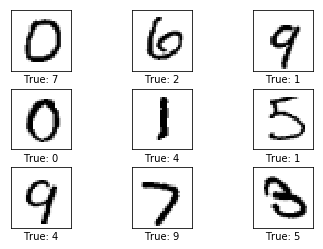

In [6]:
images = data.test.images[10:19]
cls_true = data.test.cls[0:9]
plot_images(images, cls_true)

In [7]:
x = tf.placeholder(tf.float32, [None, img_size_flat])
y_true = tf.placeholder(tf.float32, [None, num_classes])
y_true_cls = tf.placeholder(tf.int64, [None])
weights = tf.Variable(tf.zeros([img_size_flat, num_classes]))
biases = tf.Variable(tf.zeros([num_classes]))
logits = tf.matmul(x, weights) + biases
y_pred = tf.nn.softmax(logits)
y_pred_cls = tf.argmax(y_pred, axis =1)

In [28]:
# cross_entropy = tf.reduce_mean(tf.reduce.sum(y_true * tf.log(y_pred)))
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=y_true)
cost = tf.reduce_mean(cross_entropy)

In [9]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cost)

In [10]:
correct_prediction = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [ ]:
session = tf.Session()
session.run(tf.global_variables_initializer())

In [11]:
batch_size = 100

def optimize(num_iterations):
    for i in range(num_iterations):
        x_batch, y_batch = data.train.next_batch(batch_size)
        feed_dict_train = {x: x_batch, y_true: y_batch}
        session.run(optimizer, feed_dict=feed_dict_train)

In [13]:
feed_dict_test = {x: data.test.images,
                 y_true: data.test.labels,
                 y_true_cls: data.test.cls}

In [14]:
def print_accuracy():
    acc = session.run(accuracy, feed_dict=feed_dict_test)
    print("Accuracy on test-set: {0:.1%}".format(acc))

In [15]:
def print_confusion_matrix():
    cls_true = data.test.cls
    cls_pred = session.run(y_pred_cls, feed_dict=feed_dict_test)
    cm = confusion_matrix(y_true=cls_true,
                          y_pred=cls_pred)
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    
    plt.tight_layout()
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    plt.show()

In [16]:
def plot_example_errors():
    correct, cls_pred = session.run([correct_prediction, y_pred_cls],
                                    feed_dict=feed_dict_test)
    incorrect = (correct == False)
    images = data.test.images[incorrect]
    cls_pred = cls_pred[incorrect]
    cls_true = data.test.cls[incorrect]
    
    plot_images(images=images[0:9],
                cls_true=cls_true[0:9],
                cls_pred=cls_pred[0:9])

In [17]:
def plot_weights():
    w = session.run(weights)
    w_min = np.min(w)
    w_max = np.max(w)

    fig, axes = plt.subplots(3, 4)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        if i<10:
            image = w[:, i].reshape(img_shape)
            ax.set_xlabel("Weights: {0}".format(i))
            ax.imshow(image, vmin=w_min, vmax=w_max, cmap='seismic')
        ax.set_xticks([])
        ax.set_yticks([])

    plt.show()

Accuracy on test-set: 92.1%


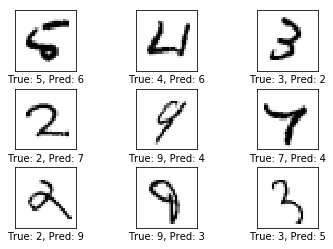

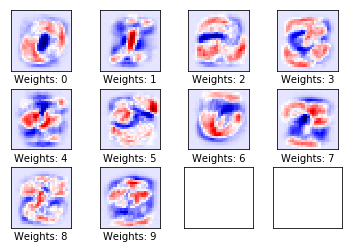

In [26]:
# print_accuracy()
# plot_example_errors()
optimize(num_iterations=1000)
print_accuracy()
plot_example_errors()
plot_weights()

In [41]:
w_final=session.run(weights)
b_final=session.run(biases)

In [37]:
# feed_dict_test = {x: data.test.images,
#                  y_true: data.test.labels,
#                  y_true_cls: data.test.cls}
# a = session.run(y_pred_cls, feed_dict = feed_dict_test)

In [70]:
def softmax_fun (x):
    answer = np.exp(x) / np.exp(x).mean(axis=0)
    return(answer)

In [92]:
# x_in=np.random.randint(0,2,784).reshape(1,784)
# x_in=np.random.randn(1,784)
x_in=np.eye(28).reshape(1,784)
x_in = x_in.astype(np.float32)
x_in.shape

(1, 784)

In [93]:
# predication
logits = np.matmul(x_in, w_final) + b_final
y_pred = softmax_fun(logits)
y_pred_cls = np.argmax(y_pred, axis=1)

In [94]:
y_pred_cls

array([0])

[[ 956    0    2    2    0    3   13    2    2    0]
 [   0 1111    2    2    0    1    4    2   13    0]
 [   6   13  916   17    6    3   19   12   35    5]
 [   3    2   20  913    0   28    4   13   19    8]
 [   1    5    3    1  904    1   21    2   11   33]
 [  10    4    3   30    7  773   24    7   27    7]
 [   6    3    3    2    7   11  923    1    2    0]
 [   2   11   26    8    6    1    0  952    2   20]
 [   7   11    7   19    7   27   16   10  864    6]
 [  10   11    1   11   31   10    1   29    9  896]]


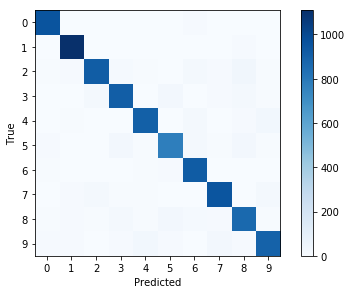

In [27]:
print_confusion_matrix()

In [22]:
# File_Writer = tf.summary.FileWriter('/Users/lambert/Documents/Python_code/tensorflow_code/TensorFlow-Tutorials',session.graph)

In [20]:
%pwd

'/Users/lambert/Documents/Python_code/tensorflow_code/TensorFlow-Tutorials'